### H&M Personalized Recommendation

For this challenge you are given the purchase history of customers across time, along with supporting metadata. Your challenge is to predict what articles each customer will purchase in the 7-day period immediately after the training data ends. Customer who did not make any purchase during that time are excluded from the scoring.

##### Files
images/ - a folder of images corresponding to each article_id; images are placed in subfolders starting with the first three digits of the article_id; note, not all article_id values have a corresponding image.
articles.csv - detailed metadata for each article_id available for purchase
customers.csv - metadata for each customer_id in dataset
sample_submission.csv - a sample submission file in the correct format
transactions_train.csv - the training data, consisting of the purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item. Your task is to predict the article_ids each customer will purchase during the 7-day period immediately after the training data period.
NOTE: You must make predictions for all customer_id values found in the sample submission. All customers who made purchases during the test period are scored, regardless of whether they had purchase history in the training data.

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
articles = pd.read_csv("articles.csv")
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


#### Unique indentifier of an article:

article_id (int64) - an unique identifier of the article, 105 542 unique values (as the length of the database)
#### 5 product related columns:

product_code (int64) - 6-digit product code, 47 224 unique values

prod_name (object) - name of a product, 132 unique values

product_type_no (int64) - product type number, 131 unique values

product_type_name (object) - name of a product type, equivalent of product_type_no

product_group_name (object) - name of a product group, in total 19 groups

#### 2 columns related to the pattern:

graphical_appearance_no - code of a pattern, 30 unique values

graphical_appearance_name - name of a pattern, 30 unique values
#### 2 columns related to the color:

colour_group_code - code of a color, 50 unique values

colour_group_name - name of a color, 50 unique values
#### 4 columns related to perceived colour (general tone):

perceived_colour_value_id - perceived color id, 8 unique values

perceived_colour_value_name - perceived color name, 8 unique values

perceived_colour_master_id - perceived master color id, 20 unique values

perceived_colour_master_name - perceived master color name, 20 unique values

#### 2 columns related to the department:

department_no - department number, 299 unique values

department_name - department name, 299 unique values

#### 4 columns related to the index, which is actually a top-level category:

index_code - index code, 10 unique values

index_name - index name, 10 unique values

index_group_no - index group code, 5 unique values

index_group_name - index group code, 5 unique values

#### 2 columns related to the section:

section_no - section number, 56 unique values

section_name - section name, 56 unique values
#### 2 columns related to the garment group:

garment_group_no - garment group number, 56 unique values

garment_group_name - garment group name, 56 unique values
#### 1 column with a detailed description of the article:

detail_desc - 43 404 unique values

In [30]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [31]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [47]:
articles['article_id'].value_counts()

108775015    1
760158001    1
760214002    1
760208001    1
760195006    1
            ..
645765001    1
645758002    1
645758001    1
645754004    1
959461001    1
Name: article_id, Length: 105542, dtype: int64

In [33]:
articles['garment_group_name'].value_counts()

Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses Ladies                    4874
Outdoor                           4501
Unknown                           3873
Trousers Denim                    3100
Swimwear                          2787
Socks and Tights                  2272
Shirts                            2116
Woven/Jersey/Knitted mix Baby     1965
Shorts                            1559
Dresses/Skirts girls              1541
Skirts                            1254
Special Offers                    1061
Dressed                            908
Name: garment_group_name, dtype: int64

In [36]:
articles['product_type_name'].value_counts()

Trousers         11169
Dress            10362
Sweater           9302
T-shirt           7904
Top               4155
                 ...  
Keychain             1
Headband             1
Cushion              1
Blanket              1
Clothing mist        1
Name: product_type_name, Length: 131, dtype: int64

In [35]:
articles.shape

(105542, 25)

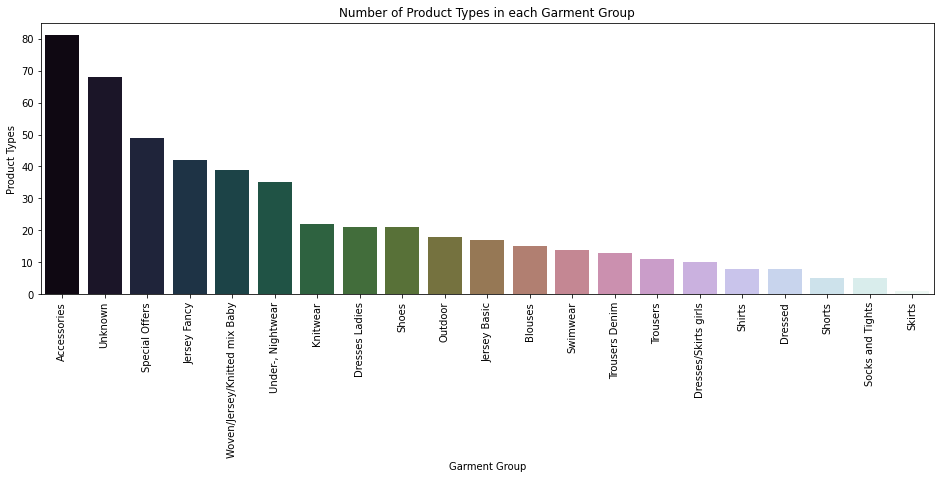

In [37]:
temp = articles.groupby(["garment_group_name"])["product_type_name"].nunique()
df1 = pd.DataFrame({"Garment Group": temp.index, "Product Types": temp.values})
df1 = df1.sort_values(["Product Types"], ascending=False)
plt.figure(figsize=(16, 5))
plt.title("Number of Product Types in each Garment Group")
s = sns.barplot(x="Garment Group", y="Product Types", data=df1, palette="cubehelix")
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()

In [39]:
df1

,Garment Group,Product Types
0,Accessories,81
19,Unknown,68
14,Special Offers,49
6,Jersey Fancy,42
20,Woven/Jersey/Knitted mix Baby,39
18,"Under-, Nightwear",35
7,Knitwear,22
3,Dresses Ladies,21
10,Shoes,21
8,Outdoor,18


In [40]:
cust = pd.read_csv("customers.csv")
cust.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [41]:
cust.shape

(1371980, 7)

In [43]:
cust['club_member_status'].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [44]:
cust.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [45]:
cust['age'].value_counts()

21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
        ...  
98.0        7
97.0        4
93.0        4
96.0        3
94.0        3
Name: age, Length: 84, dtype: int64

In [48]:
cust.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [49]:
cust.shape

(1371980, 7)

In [50]:
cust['customer_id'].nunique()

1371980

In [51]:
ss = pd.read_csv("sample_submission.csv")
ss.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [52]:
ss.shape

(632280, 2)